# Resultados

In [80]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
import joblib
from utils import *

In [82]:
dataset =  pd.read_csv('/home/vinicius/UFERSA/cilab/euthyroid_sick_syndrome/euthyroid_sick_syndrome/datasets/euthyroid/euthyroid_final_features.csv')
output_label_dataset = dataset['classification']  #1 = sick, 0 = normal
dataset = dataset[['age', 'sex', 'sick', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
dataset_res, ouput_label = balance_dataset_smote(dataset, output_label_dataset, random_state=42, k_neighbors=5)
input_train, input_test, output_train, output_test = slipt_and_standardize_dataset(dataset=dataset_res, output_label=ouput_label)                                   

## Modelos: 
1. Decision Tree
2. Random Forest
3. Logistic Regression
4. Naive Bayes

In [83]:
model_decision_tree = joblib.load('/home/vinicius/UFERSA/cilab/euthyroid_sick_syndrome/euthyroid_sick_syndrome/models_file/DecisionTreeClassifier.sav')
model_random_forest = joblib.load('/home/vinicius/UFERSA/cilab/euthyroid_sick_syndrome/euthyroid_sick_syndrome/models_file/RandomForestClassifier.sav')
model_logistic = joblib.load('/home/vinicius/UFERSA/cilab/euthyroid_sick_syndrome/euthyroid_sick_syndrome/models_file/LogisticRegression.sav')
model_naive_bayes = joblib.load('/home/vinicius/UFERSA/cilab/euthyroid_sick_syndrome/euthyroid_sick_syndrome/models_file/ClassifierBayes.sav')

In [84]:
output_model_decision = model_decision_tree.predict(input_test)
output_model_random = model_random_forest.predict(input_test)
output_model_logistic = model_logistic.predict(input_test)
output_model_bayes = model_naive_bayes.predict(input_test)

## Métricas para o modelo Decision Tree

In [85]:
accuracy(output_test, output_model_decision)
precision(output_test, output_model_decision) 
recall(output_test, output_model_decision) 
f1(output_test, output_model_decision)


A acurácia é de:  0.9817073170731707
A precisão é de:  0.9719789842381786
A pontuação de recall é de:  0.9910714285714286
A pontuação de F1 é de:  0.9814323607427056


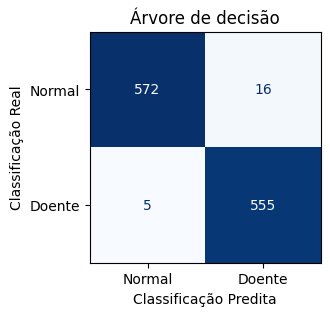

In [86]:
fig = plot_confusion_matrix(output_test, output_model_decision, model=model_decision_tree, title='Árvore de decisão')
#salva figura
fig.figure_.savefig('confusion_matrix_decision_tree.png', dpi=300, bbox_inches='tight')

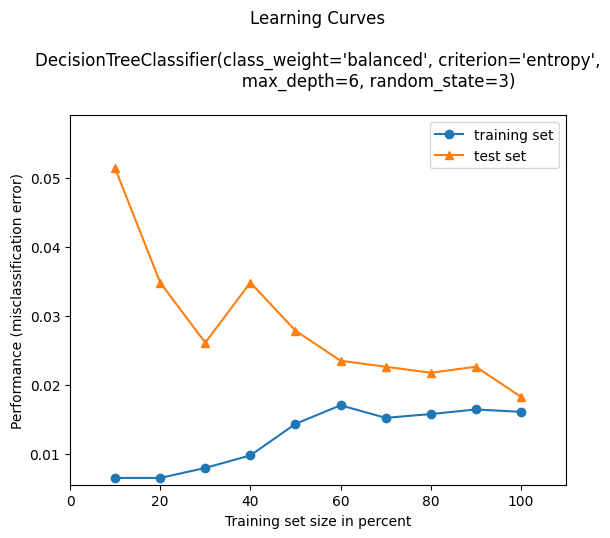

In [87]:
miss_classification(input_train, output_train, input_test, output_test, model_decision_tree)

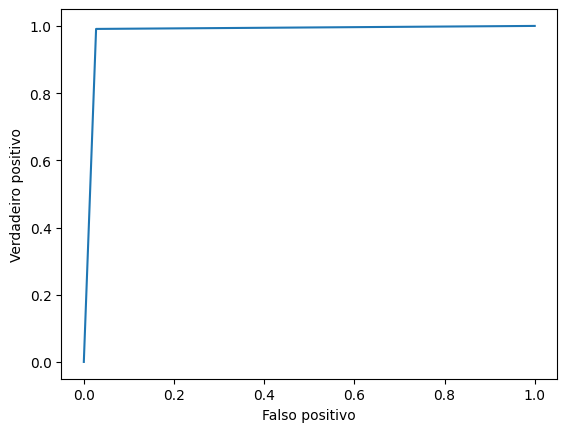

In [88]:
roc(output_test, output_model_decision) #plotando a curva ROC

## Métricas para o modelo Random Forest

In [89]:
accuracy(output_test, output_model_random)
precision(output_test, output_model_random) 
recall(output_test, output_model_random) 
f1(output_test, output_model_random)


A acurácia é de:  0.9834494773519163
A precisão é de:  0.9838998211091234
A pontuação de recall é de:  0.9821428571428571
A pontuação de F1 é de:  0.9830205540661303


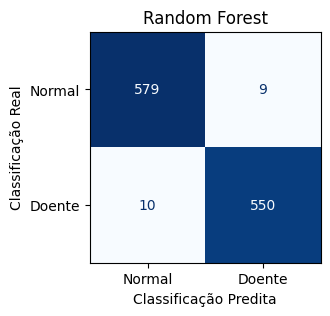

In [90]:
plot_confusion_matrix(output_test, output_model_random, model_random_forest, "Random Forest")

In [91]:
miss_classification(input_train, output_train, input_test, output_test, model_random_forest)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimator'

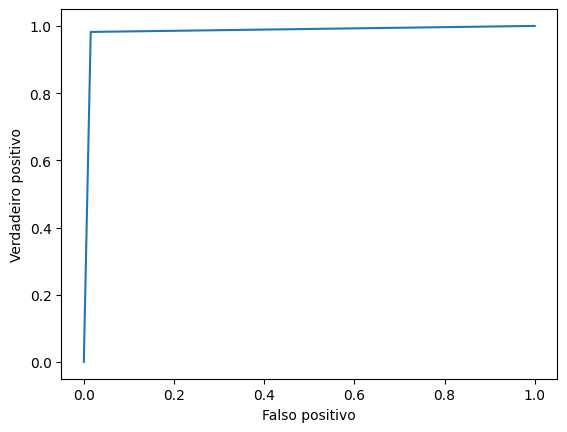

In [92]:
roc(output_test, output_model_random)

## Métricas para o modelo Logistic Regression

In [ ]:
accuracy(output_test, output_model_logistic)
precision(output_test, output_model_logistic)
recall(output_test, output_model_logistic)
f1(output_test, output_model_logistic)



A acurácia é de:  0.9198606271777003
A precisão é de:  0.90625
A pontuação de recall é de:  0.9321428571428572
A pontuação de F1 é de:  0.9190140845070423


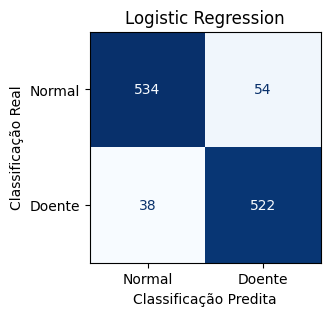

In [93]:
plot_confusion_matrix(output_test, output_model_logistic, model_logistic, "Logistic Regression")

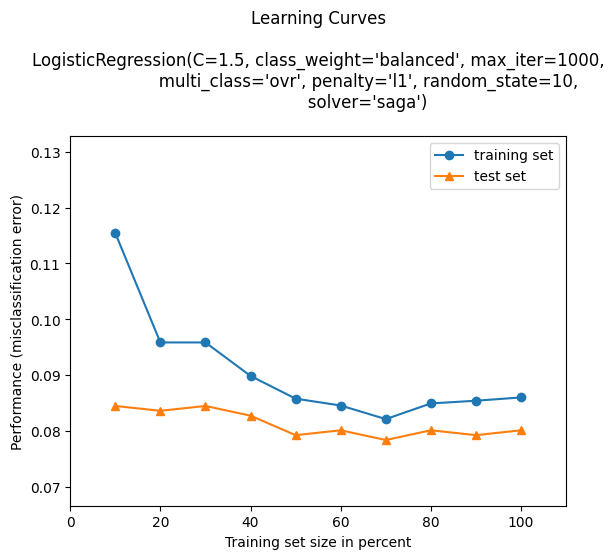

In [94]:
miss_classification(input_train, output_train, input_test, output_test, model_logistic)

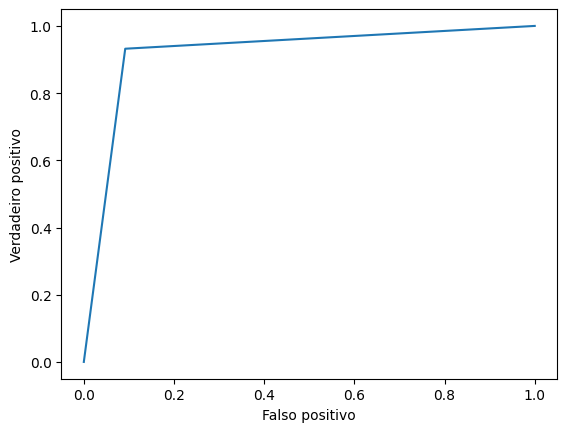

In [95]:
roc(output_test, output_model_logistic)

## Métricas para modelo Naive Bayes

In [ ]:
accuracy(output_test, output_model_bayes)
precision(output_test, output_model_bayes)
recall(output_test, output_model_bayes)
f1(output_test, output_model_bayes)


A acurácia é de:  0.8493031358885017
A precisão é de:  0.7963246554364471
A pontuação de recall é de:  0.9285714285714286
A pontuação de F1 é de:  0.8573784006595219


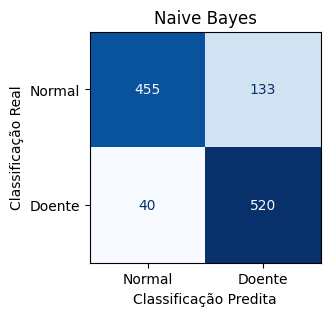

In [ ]:
plot_confusion_matrix(output_test, output_model_bayes, model_naive_bayes, "Naive Bayes")

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits


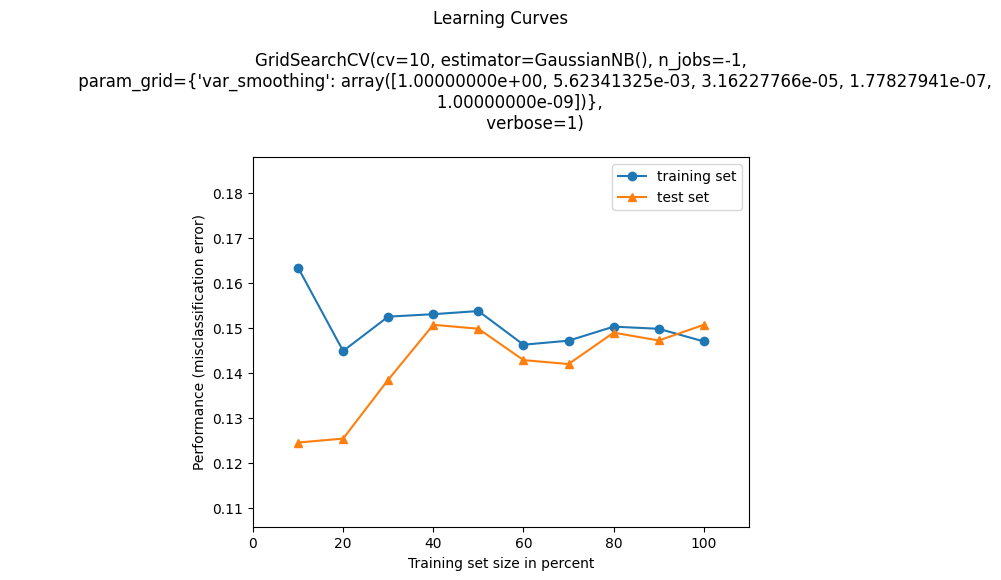

In [ ]:
miss_classification(input_train, output_train, input_test, output_test, model_naive_bayes)

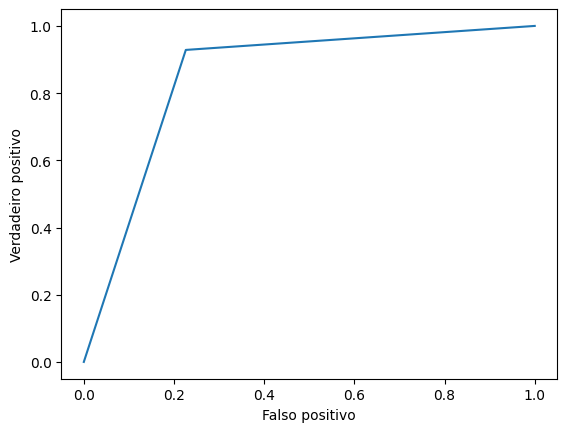

In [ ]:
roc(output_test, output_model_bayes)